In [17]:
import binascii
import numpy as np
import matplotlib.pyplot as plt

# Receptor digital

En este cuaderno veremos cómo recuperar los bits a partir de la señal ruidosa recibida.

* En primer lugar trabajaremos sabiendo en qué instantes están los bits

* Luego haremos un detector de sincronismo

## Receptor simple

El receptor más simple consiste en *muestrear* **en los centros de los pulsos** y depediendo de si la señal es positiva o negativa decidir uno o cero.

Empezaremos por la señal muestrasr que sabemos en qué instantes está el centro de los pulsos

In [18]:
# Carga de los bits que se transmitieron (para ver si hay errores)
bits=np.load('bits.npy')
# Carga de las muestras ruidosas. El primer bit corresponde 0-24, 25-49,...
muestrasr=np.load('muestrasr.npy')

In [20]:
prob1=np.mean(bits)
print(prob1)

0.4624183006535948


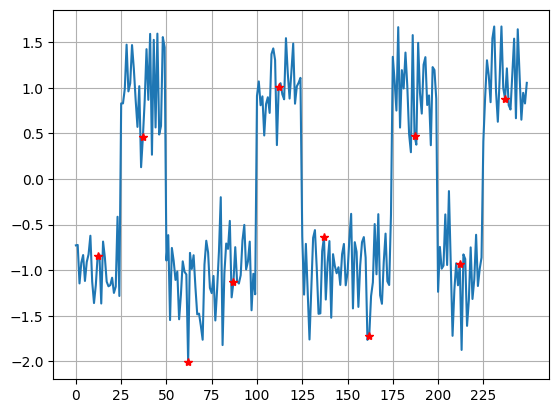

In [3]:
nmax=250
D=25
_=plt.plot(muestrasr[:250])

ticks=np.arange(D//2,nmax,D)
_=plt.plot(ticks,muestrasr[ticks],'*r')
_=plt.xticks(ticks-D//2)
_=plt.grid()

In [4]:
D=25
ampl_recibidas=muestrasr[D//2::D]
bits_recibidos=(ampl_recibidas>0).astype(np.float32)

In [5]:
print(len(bits),len(ampl_recibidas))

1224 1224


In [6]:
Prob_error=np.mean(bits_recibidos != bits)
print('Probabilidad de error:',Prob_error)

Probabilidad de error: 0.004901960784313725


### Histogramas de las amplitudes

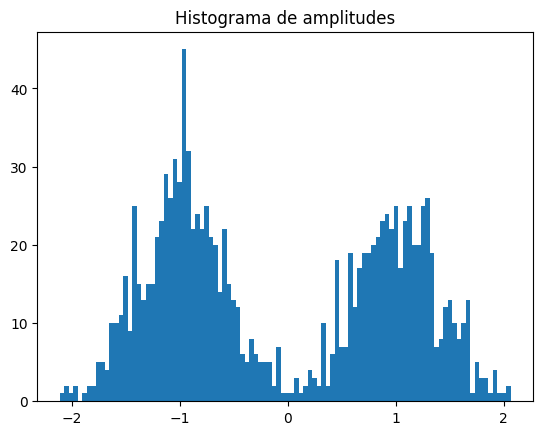

In [7]:
_=plt.hist(ampl_recibidas,100)
_=plt.title('Histograma de amplitudes')

Observamos que hay valores próximos a cero que pueden dar lugar a errores

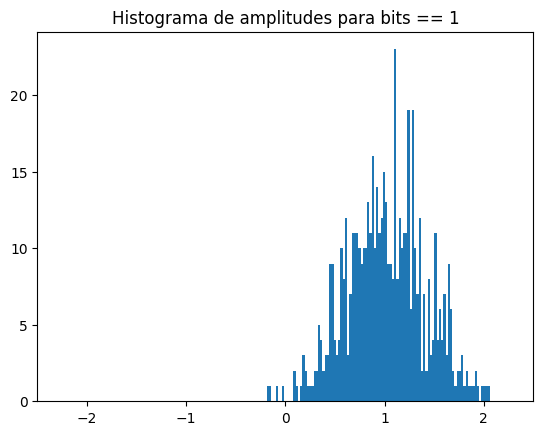

In [8]:
_=plt.hist(ampl_recibidas[bits>0.5],100)
_=plt.xlim(-2.5,2.5)
_=plt.title('Histograma de amplitudes para bits == 1')

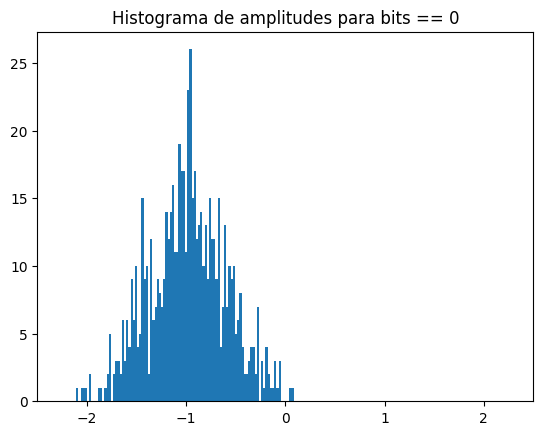

In [9]:
_=plt.hist(ampl_recibidas[bits<0.5],100)
_=plt.xlim(-2.5,2.5)
_=plt.title('Histograma de amplitudes para bits == 0')

## Receptor que calcula la media en cada símbolo

En vez de tomar el valor de la muestra central tomaremos **la media de las D muestras**

In [10]:
amplt_recibidas2=[]
n1=0
n2=n1+D

lenx=len(muestrasr)
while n2 <= lenx:
    media_simbolo=np.mean(muestrasr[n1:n2])
    amplt_recibidas2.append(media_simbolo)
    n1 += D
    n2 +=D
amplt_recibidas2 = np.array(amplt_recibidas2)
print(len(amplt_recibidas2))
bits_recibidos2=(amplt_recibidas2>0)

1224


In [11]:
Prob_error=np.mean(bits_recibidos2 != bits)
print('Probabilidad de error:',Prob_error)

Probabilidad de error: 0.0


**Observamos que todos los bits son correctos!**

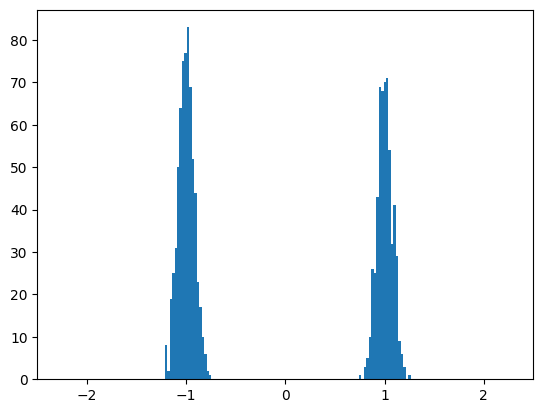

In [12]:
# Histograma de amplitudes recibibidas
_=plt.hist(amplt_recibidas2,bins=100)
_=plt.xlim(-2.5,2.5)

### Promediado deslizante

* Para hacer lo anterior es necesario conocer donde empieza y termina cada símbolo

* En la práctica se realiza la convolución con un promediador deslizante

    *  Se obtiene una señal de la misma duración que la original
 
    *  Se hace un muestreo en el centro de los pulsos de la señal filtrada


In [13]:
h=np.ones(D)/D

prom_deslizante=np.convolve(muestrasr,h,'same')

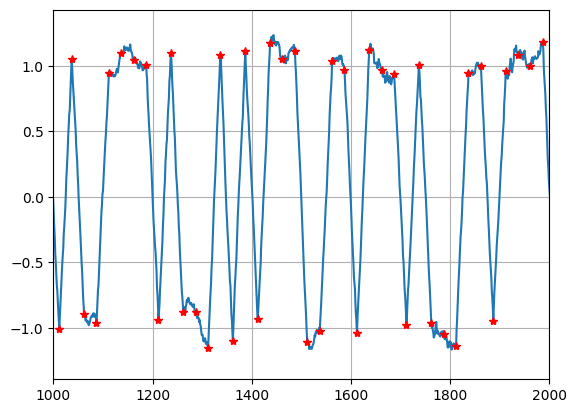

In [14]:
_=plt.plot(prom_deslizante)
instantes=np.arange(D//2,len(prom_deslizante),D)
_=plt.plot(instantes,prom_deslizante[instantes],'*r')
_=plt.xlim(1000,2000)
_=plt.grid()

In [15]:
# Obtengamos las muestras en los centros de los pulsos de la señal del promediado deslizante y comprobemos que coinciden con las medias de los bloques

ampl_recibidas3=prom_deslizante[instantes]

In [16]:
print(np.max(np.abs(ampl_recibidas3-amplt_recibidas2)))

4.440892098500626e-16
